In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime, timedelta

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_cat = pd.read_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_Final\Transformed_Data\Merge_Data_Profit_VF", parse_dates=['sale_date'])
df_cat.head(3)

,Sale_ID,Product_ID,Store_Country,Quantity_Sold,Discount_percent,sale_date,payment_method,customer_age,customer_gender,Membership,Product_Name,Category,Sale_Price_EUR,Cost_Price_EUR,Stock,Country_Origin,Brand,Color,Size,Gender,Gross_Sales,Total_Discount,Net_Sales,Total_Cost,Total_Profit_EUR,Profit_Percent
0,S000001,S001071,Australia,10,0.0,2023-05-24,Transfer,22,Not specified,No,T-shirt,Clothing,126.25,-79.54,327,EE.UU.,Nike,Red,XL,Male,1262.50,0.0,1262.50,-795.40,467.10,0.369980
1,S000002,S000592,Australia,4,0.0,2023-10-24,PayPal,23,Not specified,No,Sandals,Footwear,121.77,-68.19,117,Spain,Puma,Gray,M,Male,487.08,0.0,487.08,-272.76,214.32,0.440010
2,S000003,S001460,EE.UU.,9,0.0,2023-09-15,Cash,55,Male,No,Cap,Accessories,312.72,-212.65,53,EE.UU.,Under Armour,Black,M,Male,2814.48,0.0,2814.48,-1913.85,900.63,0.319999


In [4]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76578 entries, 0 to 76577
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale_ID           76578 non-null  object        
 1   Product_ID        76578 non-null  object        
 2   Store_Country     76578 non-null  object        
 3   Quantity_Sold     76578 non-null  int64         
 4   Discount_percent  76578 non-null  float64       
 5   sale_date         76578 non-null  datetime64[ns]
 6   payment_method    76578 non-null  object        
 7   customer_age      76578 non-null  int64         
 8   customer_gender   76578 non-null  object        
 9   Membership        76578 non-null  object        
 10  Product_Name      76578 non-null  object        
 11  Category          76578 non-null  object        
 12  Sale_Price_EUR    76578 non-null  float64       
 13  Cost_Price_EUR    76578 non-null  float64       
 14  Stock             7657

In [5]:
col_categoricas = df_cat.select_dtypes(include="object").columns
col_categoricas

Index(['Sale_ID', 'Product_ID', 'Store_Country', 'payment_method',
       'customer_gender', 'Membership', 'Product_Name', 'Category',
       'Country_Origin', 'Brand', 'Color', 'Size', 'Gender'],
      dtype='object')

In [6]:
def analisis_general_cat(df): 
    col_cat = df.select_dtypes(include="object").columns

    if len(col_cat) == 0:
        print("No hay columnas categóricas")

    else:
        for col in col_cat:
            print(f"La distribución de la columna {col.upper()}")
            print(f"Esta columna tiene {len(df[col].unique())} valores únicos")
            display(df[col].value_counts(normalize=True))
            print("_______________\n Describe")
            display(df[col].describe())
            print("----------------")

    return col_cat

In [7]:
analisis_general_cat(df_cat)

La distribución de la columna SALE_ID
Esta columna tiene 76578 valores únicos


Sale_ID
S076578    0.000013
S000001    0.000013
S076562    0.000013
S076561    0.000013
S076560    0.000013
             ...   
S000007    0.000013
S000006    0.000013
S000005    0.000013
S000004    0.000013
S000003    0.000013
Name: proportion, Length: 76578, dtype: float64

_______________
 Describe


count       76578
unique      76578
top       S076578
freq            1
Name: Sale_ID, dtype: object

----------------
La distribución de la columna PRODUCT_ID
Esta columna tiene 1716 valores únicos


Product_ID
S001148    0.000875
S000556    0.000849
S000014    0.000823
S001695    0.000823
S001063    0.000823
             ...   
S000598    0.000366
S000216    0.000366
S000818    0.000353
S001528    0.000353
S001435    0.000353
Name: proportion, Length: 1716, dtype: float64

_______________
 Describe


count       76578
unique       1716
top       S001148
freq           67
Name: Product_ID, dtype: object

----------------
La distribución de la columna STORE_COUNTRY
Esta columna tiene 8 valores únicos


Store_Country
Spain        0.126316
Australia    0.126054
Japan        0.125728
Brazil       0.125088
Germany      0.124736
Mexico       0.124279
Uruguay      0.124030
EE.UU.       0.123769
Name: proportion, dtype: float64

_______________
 Describe


count     76578
unique        8
top       Spain
freq       9673
Name: Store_Country, dtype: object

----------------
La distribución de la columna PAYMENT_METHOD
Esta columna tiene 4 valores únicos


payment_method
PayPal      0.251352
Cash        0.250529
Transfer    0.250098
Card        0.248022
Name: proportion, dtype: float64

_______________
 Describe


count      76578
unique         4
top       PayPal
freq       19248
Name: payment_method, dtype: object

----------------
La distribución de la columna CUSTOMER_GENDER
Esta columna tiene 3 valores únicos


customer_gender
Female           0.335201
Male             0.333268
Not specified    0.331531
Name: proportion, dtype: float64

_______________
 Describe


count      76578
unique         3
top       Female
freq       25669
Name: customer_gender, dtype: object

----------------
La distribución de la columna MEMBERSHIP
Esta columna tiene 2 valores únicos


Membership
Yes    0.501828
No     0.498172
Name: proportion, dtype: float64

_______________
 Describe


count     76578
unique        2
top         Yes
freq      38429
Name: Membership, dtype: object

----------------
La distribución de la columna PRODUCT_NAME
Esta columna tiene 25 valores únicos


Product_Name
Running shoes      0.063021
Sneakers           0.050419
Pants              0.049348
Boots              0.049166
Sandals            0.047168
T-shirt            0.045731
Jacket             0.043054
Gloves             0.041761
Sunglasses         0.040926
Balls              0.040756
Bracelet           0.040116
Leggings           0.038745
Jump Rope          0.038562
Football shoes     0.038118
Coat               0.038014
Resitance bands    0.037426
Yoga mat           0.036838
Foam Roller        0.036538
Cap                0.035506
Towel              0.034866
Shorts             0.032268
Weight Discs       0.030936
Backpack           0.030662
Rackets            0.030191
Belt               0.029865
Name: proportion, dtype: float64

_______________
 Describe


count             76578
unique               25
top       Running shoes
freq               4826
Name: Product_Name, dtype: object

----------------
La distribución de la columna CATEGORY
Esta columna tiene 4 valores únicos


Category
Accessories    0.253702
Equipment      0.251247
Footwear       0.247891
Clothing       0.247160
Name: proportion, dtype: float64

_______________
 Describe


count           76578
unique              4
top       Accessories
freq            19428
Name: Category, dtype: object

----------------
La distribución de la columna COUNTRY_ORIGIN
Esta columna tiene 8 valores únicos


Country_Origin
Mexico       0.136658
Japan        0.130743
Spain        0.127582
Australia    0.126459
Brazil       0.123756
Uruguay      0.119682
Germany      0.118663
EE.UU.       0.116456
Name: proportion, dtype: float64

_______________
 Describe


count      76578
unique         8
top       Mexico
freq       10465
Name: Country_Origin, dtype: object

----------------
La distribución de la columna BRAND
Esta columna tiene 5 valores únicos


Brand
Reebok          0.212750
Under Armour    0.208963
Adidas          0.198347
Puma            0.193593
Nike            0.186346
Name: proportion, dtype: float64

_______________
 Describe


count      76578
unique         5
top       Reebok
freq       16292
Name: Brand, dtype: object

----------------
La distribución de la columna COLOR
Esta columna tiene 6 valores únicos


Color
Red      0.183173
Blue     0.183016
White    0.164394
Gray     0.160177
Black    0.155045
Green    0.154196
Name: proportion, dtype: float64

_______________
 Describe


count     76578
unique        6
top         Red
freq      14027
Name: Color, dtype: object

----------------
La distribución de la columna SIZE
Esta columna tiene 4 valores únicos


Size
L     0.262412
S     0.249367
M     0.245893
XL    0.242328
Name: proportion, dtype: float64

_______________
 Describe


count     76578
unique        4
top           L
freq      20095
Name: Size, dtype: object

----------------
La distribución de la columna GENDER
Esta columna tiene 2 valores únicos


Gender
Male      0.52438
Female    0.47562
Name: proportion, dtype: float64

_______________
 Describe


count     76578
unique        2
top        Male
freq      40156
Name: Gender, dtype: object

----------------


Index(['Sale_ID', 'Product_ID', 'Store_Country', 'payment_method',
       'customer_gender', 'Membership', 'Product_Name', 'Category',
       'Country_Origin', 'Brand', 'Color', 'Size', 'Gender'],
      dtype='object')

In [8]:
def subplot_col_cat(df, max_unique=100, top_n=20):
    categorical_col = df.select_dtypes(include=["object", "category"]).columns

    if len(categorical_col) == 0:
        print("No hay columnas categóricas en el DF")
        return
    
    categorical_col = [col for col in categorical_col if df[col].unique() <= max_unique]

    num_cols = len(categorical_col)
    rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(rows,3, figsize=(15, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_col):
        top_categories = df[col].value_counts().nlargest(top_n).index
        filtered_data = df[df[col].isin(top_categories)]
        sns.countplot(data=df, x= col, ax=axes[i], hue=col, palette="tab10", legend=False, order=top_categories)
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation = 90)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [9]:
col_cat_grap = ['Store_Country', 'payment_method',
       'customer_gender', 'Membership', 'Product_Name', 'Category',
       'Country_Origin', 'Brand', 'Color', 'Size', 'Gender']

Distribución de la columna Store_Country


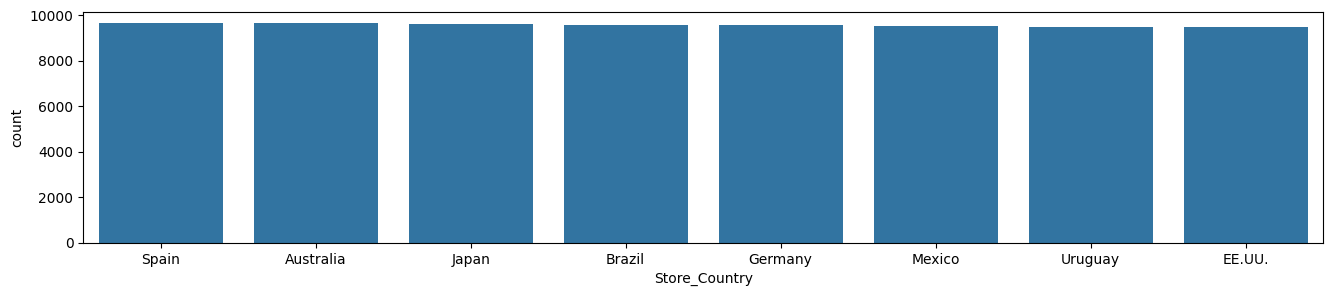

Distribución de la columna payment_method


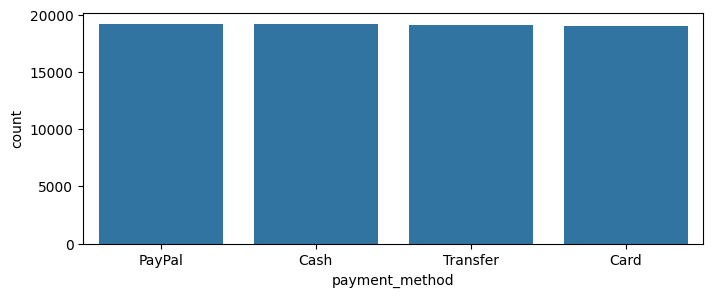

Distribución de la columna customer_gender


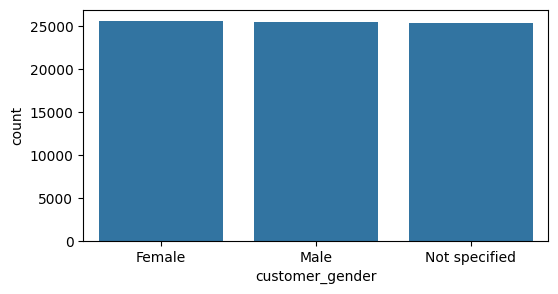

Distribución de la columna Membership


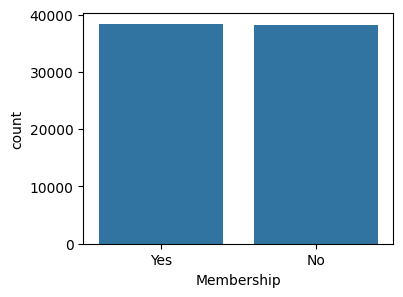

Distribución de la columna Product_Name


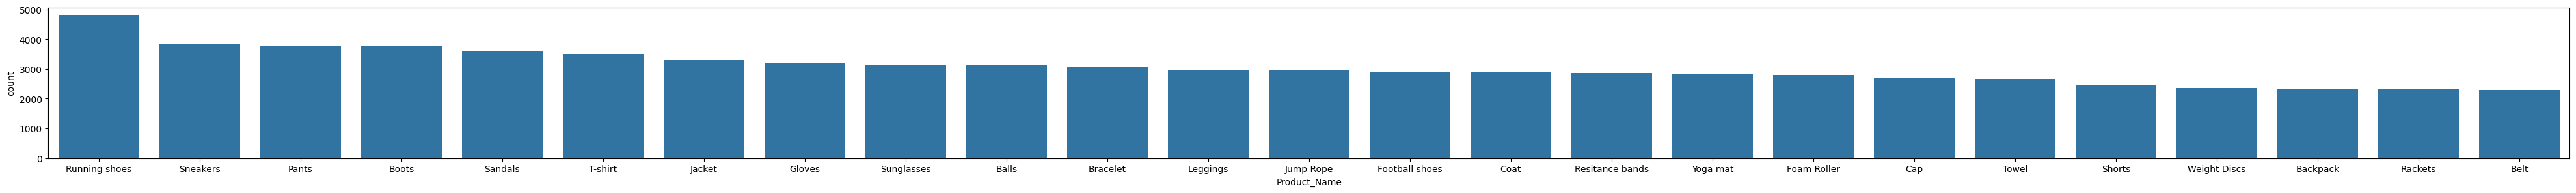

Distribución de la columna Category


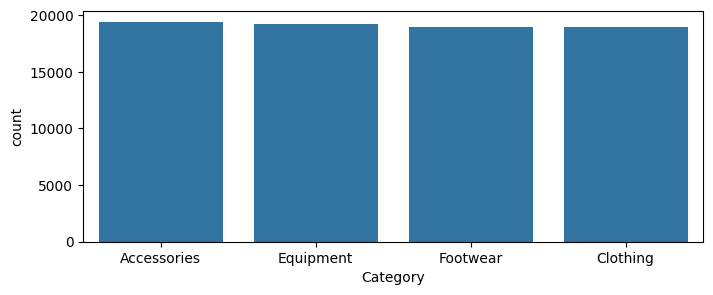

Distribución de la columna Country_Origin


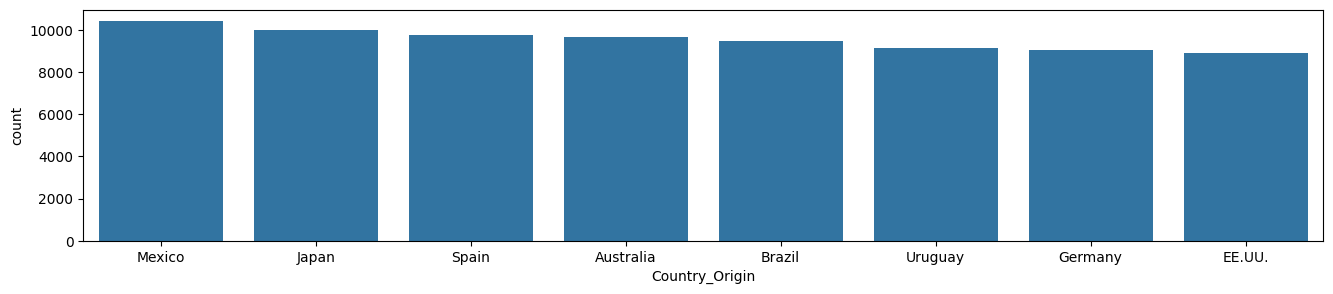

Distribución de la columna Brand


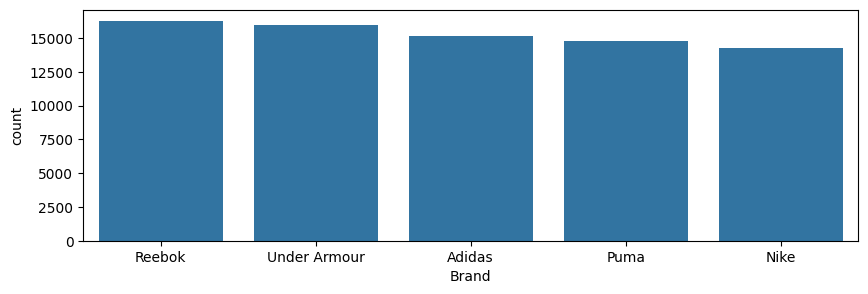

Distribución de la columna Color


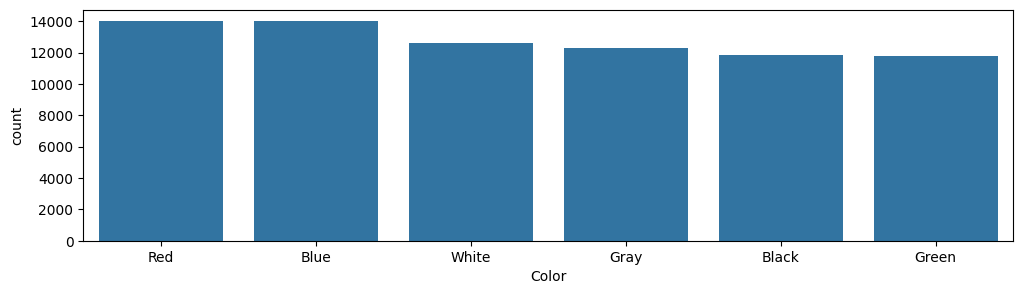

Distribución de la columna Size


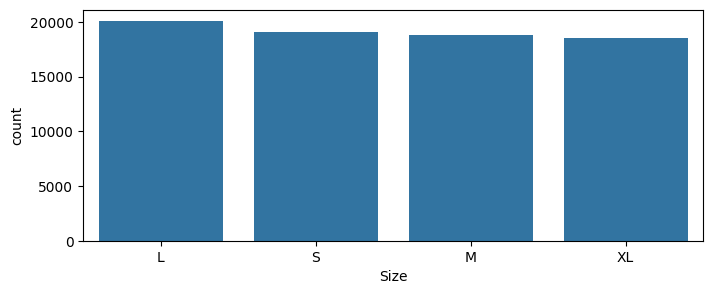

Distribución de la columna Gender


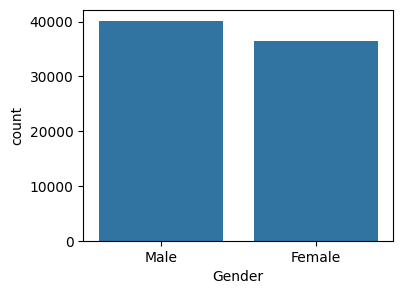

In [10]:
for col in col_cat_grap:
    print(f"Distribución de la columna {col}")
    plt.figure(figsize=(df_cat[col].nunique() * 2, 3))
    sns.countplot(x=df_cat[col], order=df_cat[col].value_counts().index)
    plt.show()